In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import scanpy as sc
from util import standard_scanpy

# PBMC Demo

In [7]:
adata = sc.datasets.pbmc3k()
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_genes(adata, min_cells=10)
adata = standard_scanpy(adata)

In [8]:
pbmc_genes = ['CST3', 'NKG7', 'CD79A', 'CD79B']

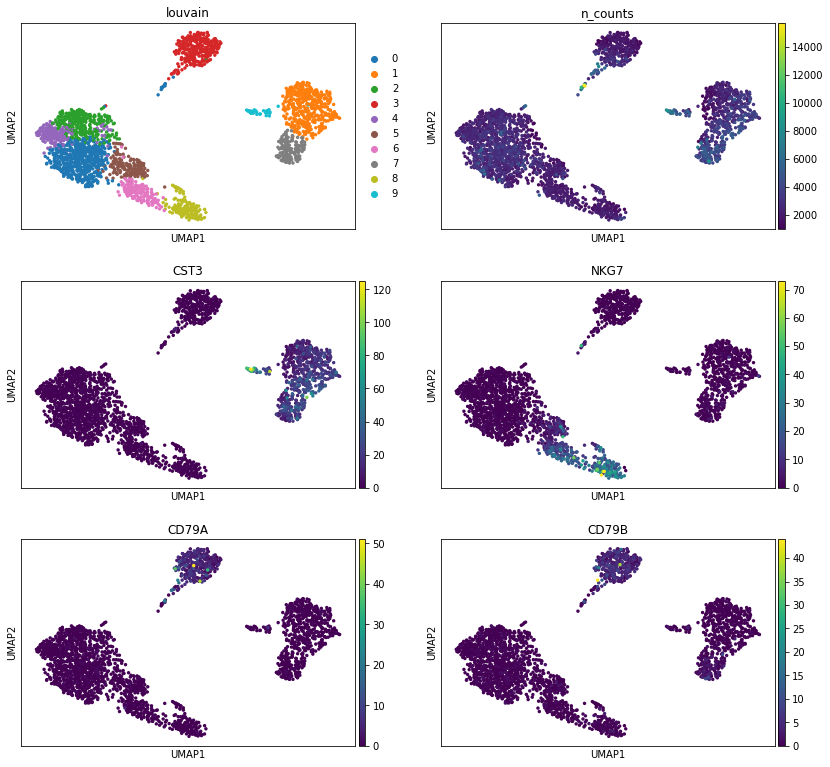

In [9]:
sc.pl.umap(adata, color=['louvain', 'n_counts'] + pbmc_genes, ncols = 2)

Scatter plots of original data (counts and sqrt norm) are dominated by zeros.

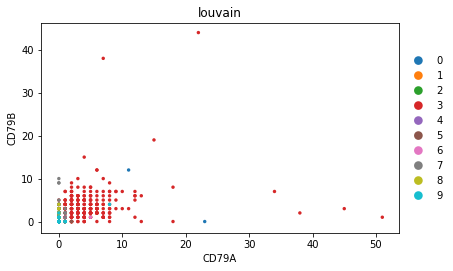

In [10]:
sc.pl.scatter(adata, 'CD79A', 'CD79B', color='louvain', use_raw = True)

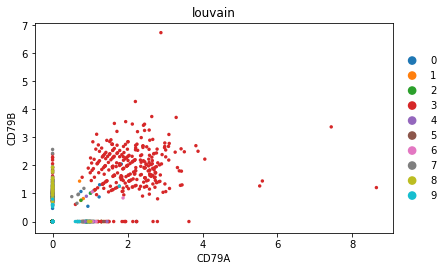

In [11]:
sc.pl.scatter(adata, 'CD79A', 'CD79B', color='louvain', use_raw = False)

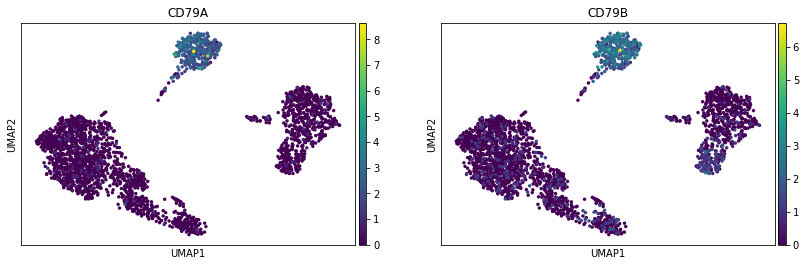

In [12]:
sc.pl.umap(adata, color=['CD79A', 'CD79B'], ncols = 2, use_raw = False)

In [13]:
from diffusion import n2s_magic
from util import standard_scanpy

Running MAGIC on 2547 cells and 11087 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 3.02 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.87 seconds.
  Calculating affinities...
  Calculated affinities in 1.23 seconds.
Calculated graph and diffusion operator in 5.21 seconds.


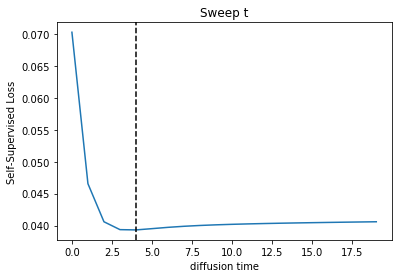

In [14]:
denoised = n2s_magic(adata, verbose = False)

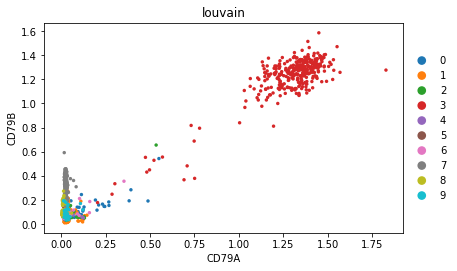

In [15]:
sc.pl.scatter(denoised, 'CD79A', 'CD79B', color='louvain', use_raw = False)

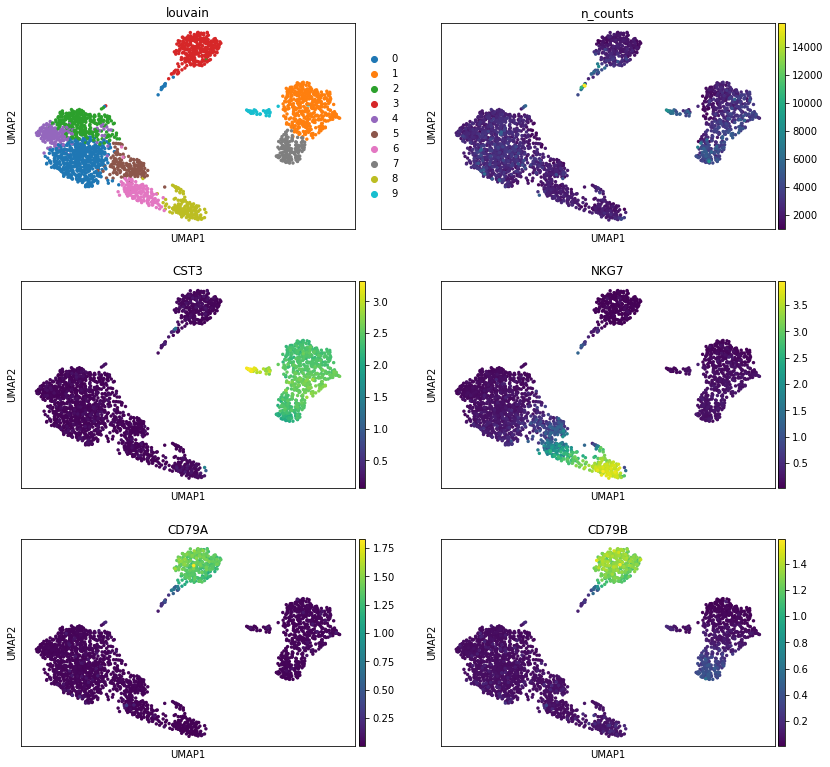

In [16]:
sc.pl.umap(denoised, color=['louvain', 'n_counts'] + pbmc_genes, ncols = 2, use_raw = False)

The modal gene diffusion time is 4, but there are many genes which want to keep going.

Running MAGIC on 2547 cells and 11087 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/Users/josh/.local/lib/python3.6/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculated PCA in 3.25 seconds.
  Calculating KNN search...
  Calculated KNN search in 1.11 seconds.
  Calculating affinities...
  Calculated affinities in 1.35 seconds.
Calculated graph and diffusion operator in 5.81 seconds.


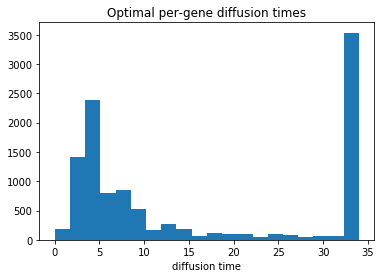

In [17]:
denoised_gene, best_t, t_range, losses = n2s_magic(adata, per_gene=True, verbose=True, max_t = 35)

The long diffusion times may be improving things only very slightly.

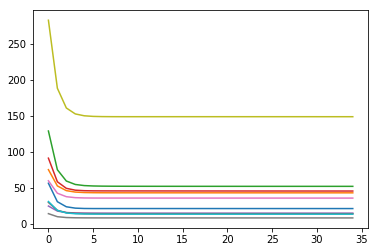

In [18]:
ax = plt.plot(losses[:, best_t > 30][:,:10])

Indeed, the reductions in loss past t = 5 are on the order of less than 1% of the magnitude of the error and those past t = 10 are on order of 0.1%.

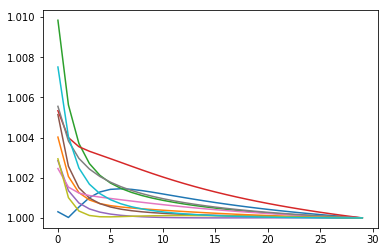

In [19]:
late_losses = losses[5:, best_t > 30][:,:10]
ax = plt.plot(late_losses/late_losses.min(axis=0, keepdims=True))

Do these take place for mostly lowly-expressed genes? They seem to be at the low end of expression, and in about 1 in 50 cells. Could these be genes which are present truly at random, ie, bulk levels, and so complete mixing is the ideal? We could, eg, see where they lie on the "variance" spectrum.

In [314]:
gene_abundance = np.sum(np.array(adata.X.todense() > 0), axis = 0)/adata.X.shape[0]
gene_expression = np.array((adata.raw.X.todense())).sum(axis = 0)
gene_expression = gene_expression/gene_expression.sum()

Text(0,0.5,'fraction of cells detected in (log10)')

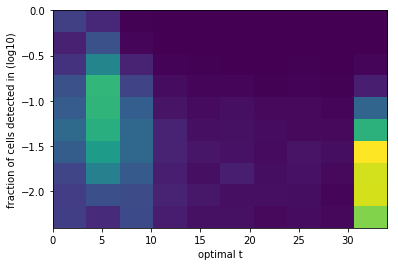

In [316]:
counts, bins_0, bins_1, fig = plt.hist2d(best_t, np.log10(gene_abundance))
plt.xlabel("optimal t")
plt.ylabel("fraction of cells detected in (log10)")

Text(0,0.5,'bulk expression (log10)')

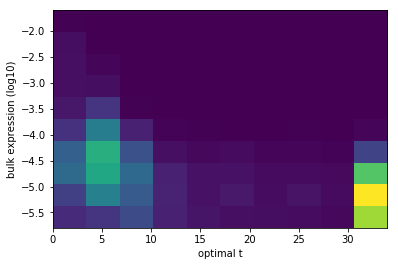

In [295]:
counts, bins_0, bins_1, fig = plt.hist2d(best_t, np.log10(gene_expression))
plt.xlabel("optimal t")
plt.ylabel("bulk expression (log10)")

Indeed, they seem to lie on the Poisson line.

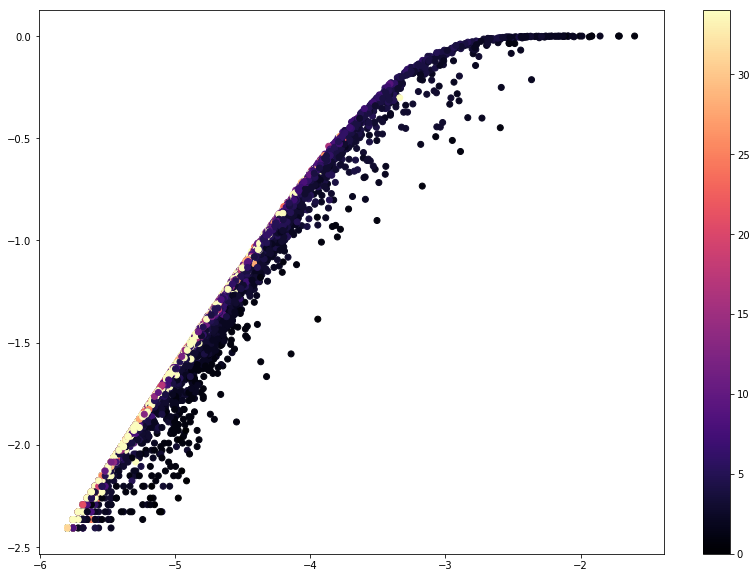

In [330]:
plt.figure(figsize=(14,10))
plt.scatter(np.log10(gene_expression), np.log10(gene_abundance), c=best_t, cmap = 'magma')
plt.colorbar()

In [ ]:
When we restrict to just the 

Text(0.5,1,'Genes with high diffusion times are on the Poisson curve.')

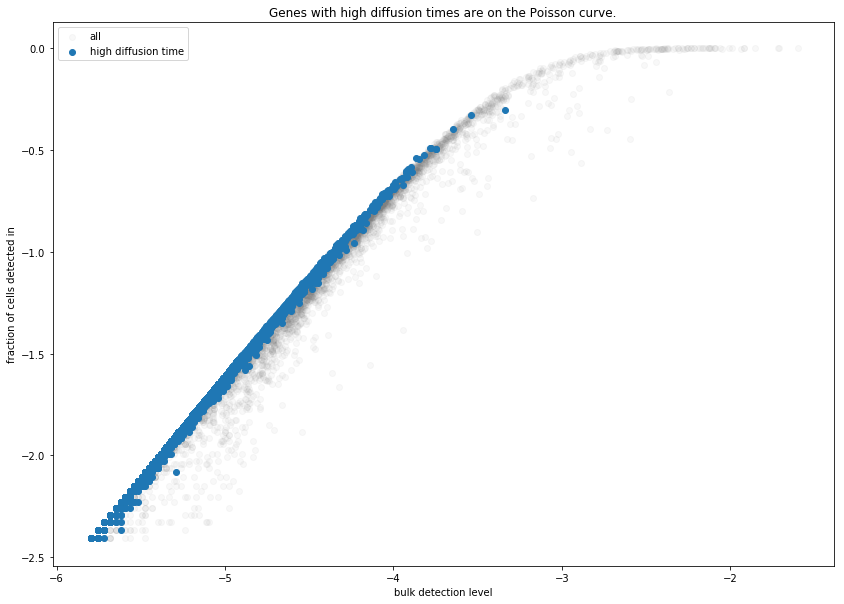

In [340]:
plt.figure(figsize=(14,10))
plt.scatter(np.log10(gene_expression), np.log10(gene_abundance), c = 'gray', alpha=0.05, label='all')
plt.scatter(np.log10(gene_expression[best_t > 10]), np.log10(gene_abundance[best_t > 10]), label='high diffusion time')
plt.legend()
plt.xlabel('bulk detection level')
plt.ylabel('fraction of cells detected in')
plt.title('Genes with high diffusion times are on the Poisson curve.')

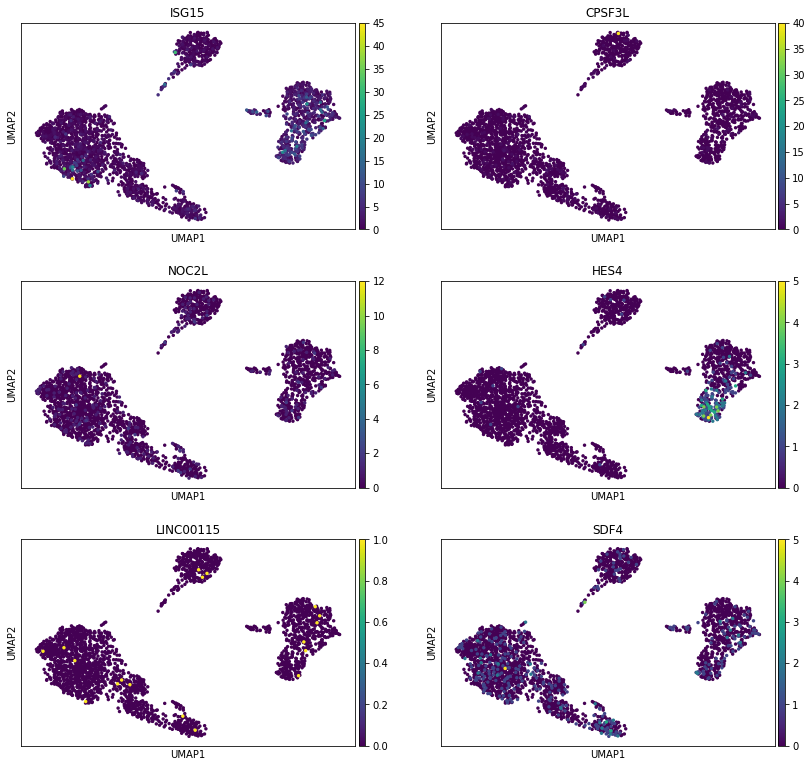

In [304]:
early_genes = adata.var_names[(best_t == 2)][:2].tolist()
middle_genes = adata.var_names[(best_t == 4)][:2].tolist()
late_genes = adata.var_names[(best_t > 17)][:2].tolist()
display_genes = early_genes + middle_genes + late_genes

sc.pl.umap(adata, color= display_genes, ncols = 2)

# Paul Demo

In [341]:
adata = sc.read('/Users/josh/src/noise2self-single-cell/data/paul/paul.h5ad')

In [342]:
sc.pp.filter_cells(adata, min_counts=1000)
sc.pp.filter_genes(adata, min_cells=10)
adata = standard_scanpy(adata)

In [346]:
paul_genes = ['Klf1', 'Ifitm1', 'Mpo', 'Ccl5']

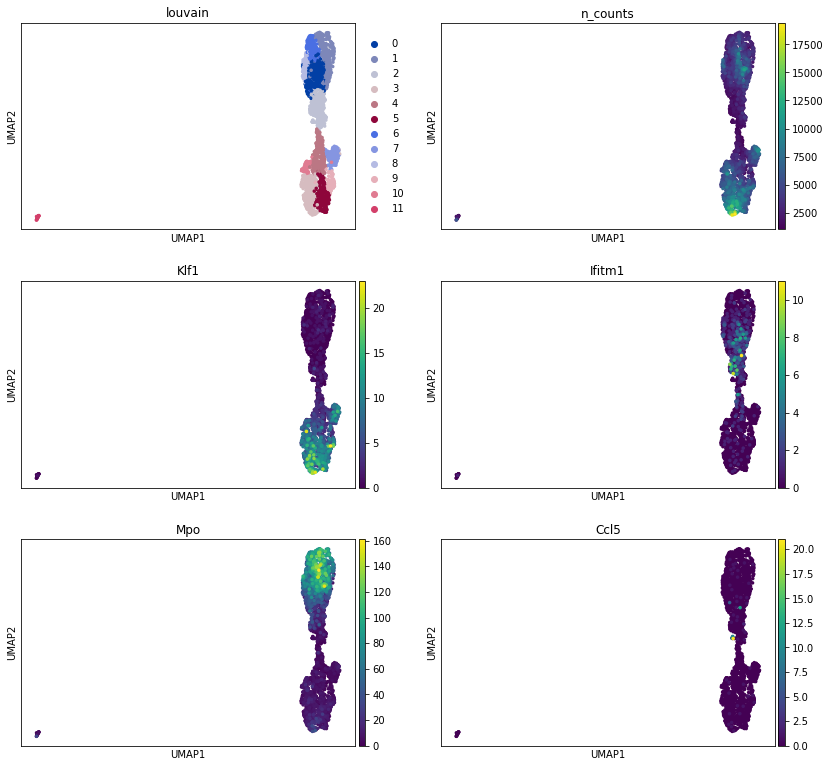

In [347]:
sc.pl.umap(adata, color=['louvain', 'n_counts'] + paul_genes, ncols = 2)

Scatter plots of original data (counts and sqrt norm) are dominated by zeros.

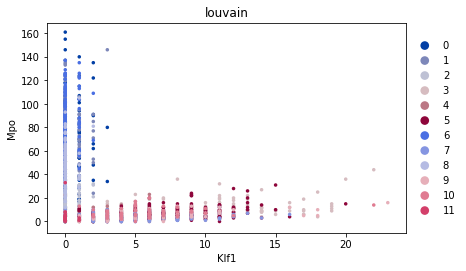

In [349]:
sc.pl.scatter(adata, paul_genes[0], paul_genes[2], color='louvain', use_raw = True)

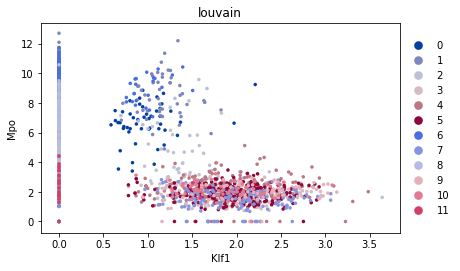

In [350]:
sc.pl.scatter(adata, paul_genes[0], paul_genes[2], color='louvain', use_raw = False)

In [351]:
from diffusion import n2s_magic
from util import standard_scanpy

Running MAGIC on 2415 cells and 10782 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 3.85 seconds.
  Calculating KNN search...
  Calculated KNN search in 1.13 seconds.
  Calculating affinities...
  Calculated affinities in 1.30 seconds.
Calculated graph and diffusion operator in 6.42 seconds.


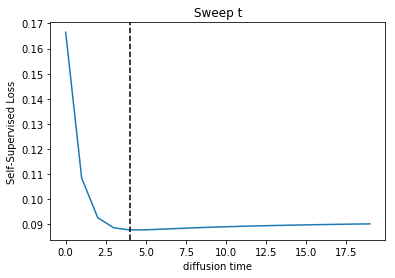

In [352]:
denoised = n2s_magic(adata, verbose = False)

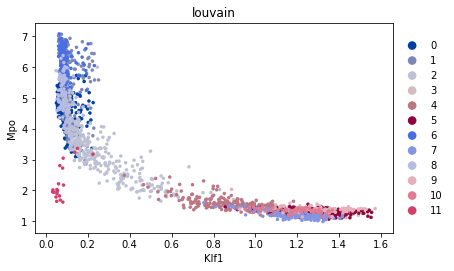

In [353]:
sc.pl.scatter(denoised, paul_genes[0], paul_genes[2], color='louvain', use_raw = False)

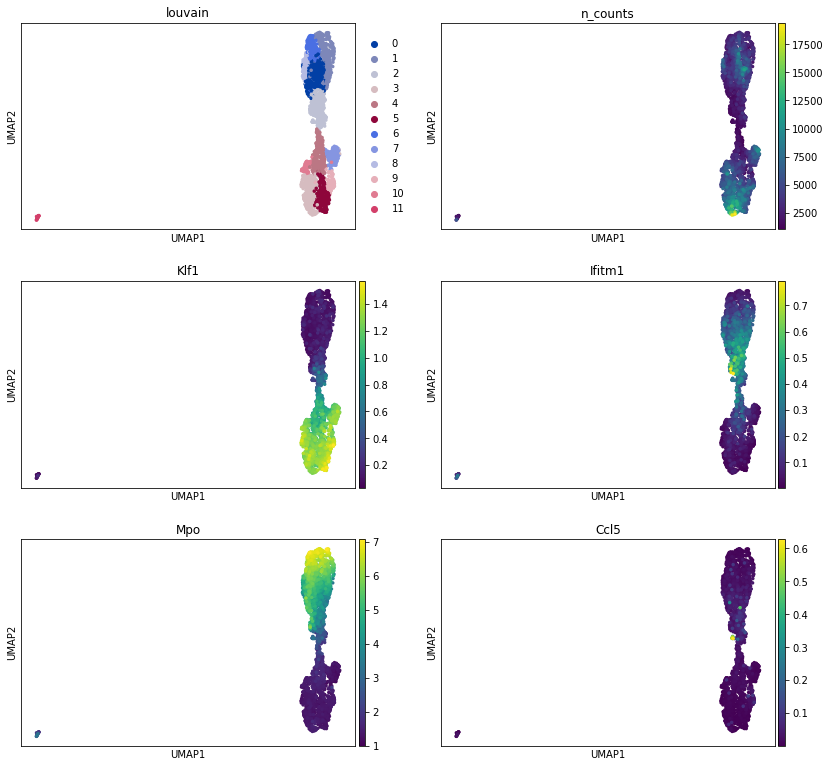

In [354]:
sc.pl.umap(denoised, color=['louvain', 'n_counts'] + paul_genes, ncols = 2, use_raw = False)

The modal gene diffusion time is 4, but there are many genes which want to keep going.

Running MAGIC on 2415 cells and 10782 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 3.01 seconds.
  Calculating KNN search...
  Calculated KNN search in 1.38 seconds.
  Calculating affinities...
  Calculated affinities in 1.21 seconds.
Calculated graph and diffusion operator in 5.71 seconds.


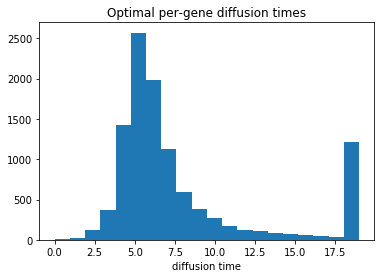

In [355]:
denoised_gene, best_t, t_range, losses = n2s_magic(adata, per_gene=True, verbose=True, max_t = 20)

Do these take place for mostly lowly-expressed genes? They seem to be at the low end of expression, and in about 1 in 50 cells. Could these be genes which are present truly at random, ie, bulk levels, and so complete mixing is the ideal? We could, eg, see where they lie on the "variance" spectrum.

In [362]:
gene_abundance = np.sum(np.array(adata.X > 0), axis = 0)/adata.X.shape[0]
gene_expression = adata.raw.X.sum(axis = 0)
gene_expression = gene_expression/gene_expression.sum()

Text(0,0.5,'fraction of cells detected in (log10)')

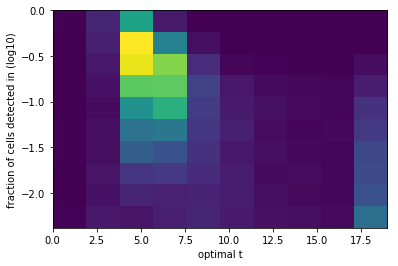

In [363]:
counts, bins_0, bins_1, fig = plt.hist2d(best_t, np.log10(gene_abundance))
plt.xlabel("optimal t")
plt.ylabel("fraction of cells detected in (log10)")

Text(0,0.5,'bulk expression (log10)')

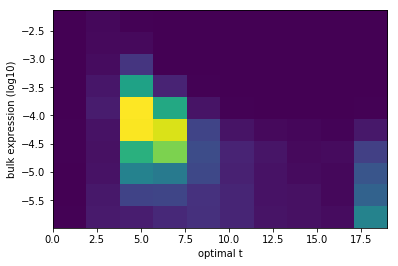

In [364]:
counts, bins_0, bins_1, fig = plt.hist2d(best_t, np.log10(gene_expression))
plt.xlabel("optimal t")
plt.ylabel("bulk expression (log10)")

Indeed, they seem to lie on the Poisson line.

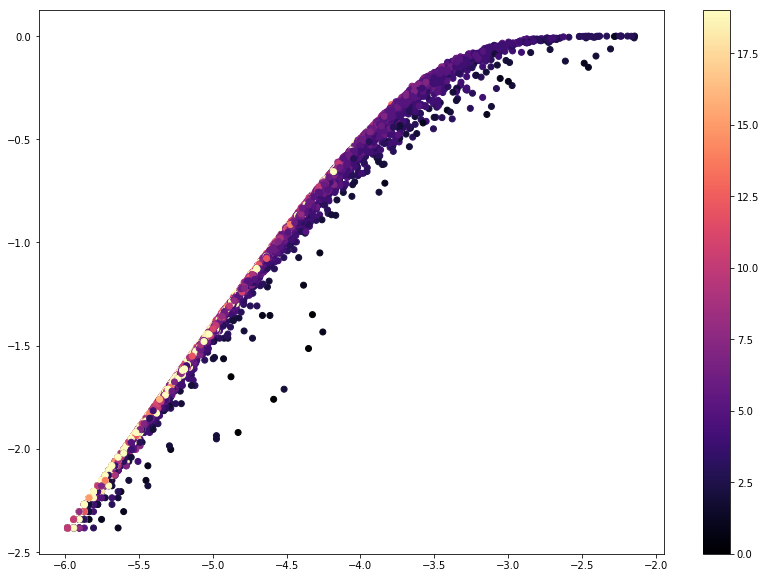

In [365]:
plt.figure(figsize=(14,10))
plt.scatter(np.log10(gene_expression), np.log10(gene_abundance), c=best_t, cmap = 'magma')
plt.colorbar()

Text(0.5,1,'Genes with high diffusion times are on the Poisson curve.')

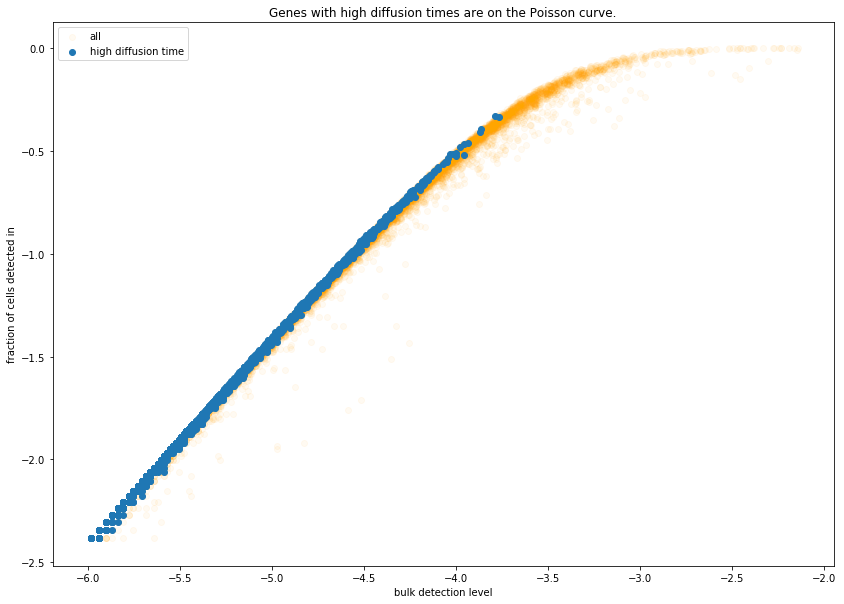

In [380]:
plt.figure(figsize=(14,10))
plt.scatter(np.log10(gene_expression), np.log10(gene_abundance), c = 'orange', alpha=0.05, label='all')
plt.scatter(np.log10(gene_expression[best_t > 10]), np.log10(gene_abundance[best_t > 10]),
            label='high diffusion time')
plt.legend()
plt.xlabel('bulk detection level')
plt.ylabel('fraction of cells detected in')
plt.title('Genes with high diffusion times are on the Poisson curve.')

Text(0.5,1,'Genes with low diffusion times are high expression or under the Poisson curve.')

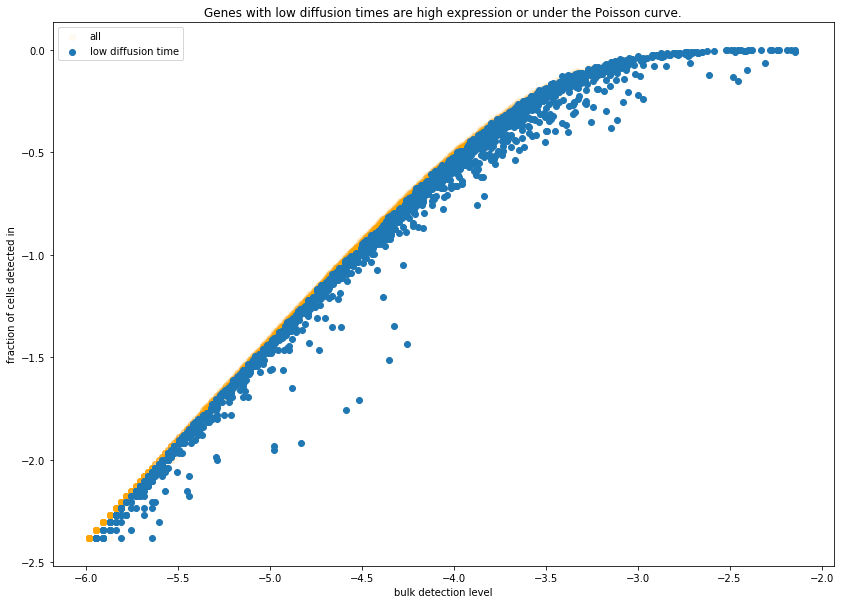

In [382]:
plt.figure(figsize=(14,10))
plt.scatter(np.log10(gene_expression), np.log10(gene_abundance), c = 'orange', alpha=0.05, label='all')
plt.scatter(np.log10(gene_expression[best_t < 5]), np.log10(gene_abundance[best_t < 5]),
            label='low diffusion time')
plt.legend()
plt.xlabel('bulk detection level')
plt.ylabel('fraction of cells detected in')
plt.title('Genes with low diffusion times are high expression or under the Poisson curve.')

# Scratch

In [ ]:
early_genes = adata.var_names[(best_t == 2)][:2].tolist()
middle_genes = adata.var_names[(best_t == 4)][:2].tolist()
late_genes = adata.var_names[(best_t > 17)][:2].tolist()
display_genes = early_genes + middle_genes + late_genes

sc.pl.umap(adata, color= display_genes, ncols = 2)

In [19]:
Y = np.array(paul[:,['Klf1', 'Mpo']].X)

t_range = np.arange(0, 20)
corrs = []
for i in t_range:

    corrs.append(np.corrcoef(Y.T)[0,1])
    Y = diff_op.dot(Y)
    
corrs = np.array(corrs)

Text(0.5,1,'Correlations get more extreme')

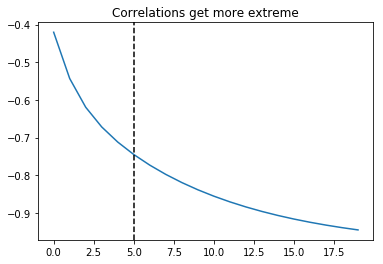

In [20]:
plt.plot(t_range, corrs)
plt.axvline(t_opt, color='k', linestyle='--')
plt.title("Correlations get more extreme")

## MAGIC hyperparameters

The parameters set number of neighbors (knn) and scale of exponential downweighting as a function
of distance. Somehow knn is not reflected in the actual support of the transition operator,
though the probability of remaining fixed is 1/k (with decay = None). Once decay is introduced, the transition matrix has a much smaller term on the diagonal.

In [77]:
X = sc.read('/Users/josh/src/noise2self-single-cell/data/paul/paul.h5ad').X
X = np.sqrt(normalize_rows(X))

In [78]:
magic_op = magic.MAGIC(knn=10, decay=None)
magic_op.fit(X)

Running MAGIC on 2417 cells and 10783 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 2.07 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.79 seconds.
Calculated graph and diffusion operator in 2.87 seconds.


MAGIC(a=None, decay=None, k=None, knn=10, knn_dist='euclidean', n_jobs=1,
   n_pca=100, random_state=None, t='auto', verbose=1)

In [81]:
# Diagonal
np.diag(magic_op.diff_op.todense()).mean()

0.1071863196056669

In [82]:
# Neighbors
(magic_op.diff_op > 0).sum(axis = 0).mean()

18.505171700455108

In [84]:
magic_op = magic.MAGIC(knn=10, decay=15, verbose = False)
magic_op.fit(X)

# Diagonal
print("Mean Diagonal: ", np.diag(magic_op.diff_op.todense()).mean())
# Neighbors
print("Mean degree: ", (magic_op.diff_op > 0).sum(axis = 0).mean())

Mean Diagonal:  0.08358148742748085
Mean degree:  324.4191146048821


In [85]:
magic_op = magic.MAGIC(knn=10, decay=5, verbose = False)
magic_op.fit(X)

# Diagonal
print("Mean Diagonal: ", np.diag(magic_op.diff_op.todense()).mean())
# Neighbors
print("Mean degree: ", (magic_op.diff_op > 0).sum(axis = 0).mean())

Mean Diagonal:  0.018280762943613124
Mean degree:  1642.328920148945


In [86]:
magic_op = magic.MAGIC(knn=10, decay=25, verbose = False)
magic_op.fit(X)

# Diagonal
print("Mean Diagonal: ", np.diag(magic_op.diff_op.todense()).mean())
# Neighbors
print("Mean degree: ", (magic_op.diff_op > 0).sum(axis = 0).mean())

Mean Diagonal:  0.11107210438273216
Mean degree:  121.69176665287547


Mean Diagonal:  0.19857969279269075
Mean degree:  76.6086057095573


(array([20.,  4.,  2.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([9.50707102e-06, 1.80504419e-02, 3.60913767e-02, 5.41323115e-02,
        7.21732463e-02, 9.02141811e-02, 1.08255116e-01, 1.26296051e-01,
        1.44336985e-01, 1.62377920e-01, 1.80418855e-01]),
 <a list of 10 Patch objects>)

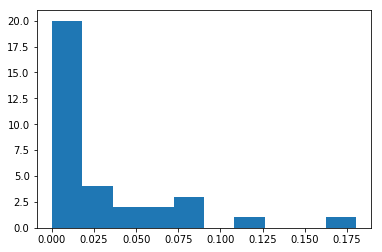

In [96]:
magic_op = magic.MAGIC(knn=5, decay=25, verbose = False)
magic_op.fit(X)

# Diagonal
print("Mean Diagonal: ", np.diag(magic_op.diff_op.todense()).mean())
# Neighbors
print("Mean degree: ", (magic_op.diff_op > 0).sum(axis = 0).mean())

col = np.array(magic_op.diff_op[:,2].todense()).ravel()
plt.hist(col[col > 0])

Mean Diagonal:  0.14429226722684585
Mean degree:  227.59743483657425


(array([19.,  3.,  6.,  2.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.00109764, 0.01625874, 0.03141985, 0.04658095, 0.06174205,
        0.07690315, 0.09206425, 0.10722536, 0.12238646, 0.13754756,
        0.15270866]),
 <a list of 10 Patch objects>)

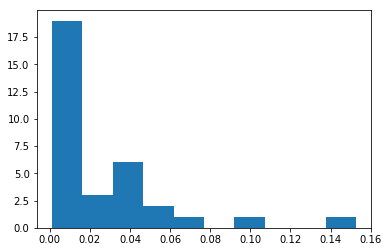

In [99]:
magic_op = magic.MAGIC(knn=5, decay=15, verbose = False)
magic_op.fit(X)

# Diagonal
print("Mean Diagonal: ", np.diag(magic_op.diff_op.todense()).mean())
# Neighbors
print("Mean degree: ", (magic_op.diff_op > 0).sum(axis = 0).mean())

col = np.array(magic_op.diff_op[:,2].todense()).ravel()
plt.hist(col[col > 0.001])

## Sensitivity of PCA

The sensitivity of PCA to a particular input coordinate is equal to the diagonal matrix element of $VV^T$. If $X = USV^T$, then these are just the norms of the rows of $V$.

In [100]:
from sklearn.utils.extmath import randomized_svd

In [116]:
X = sc.read('/Users/josh/src/noise2self-single-cell/data/paul/paul.h5ad').X
X = np.sqrt(normalize_rows(X))

In [117]:
U, S, VT = randomized_svd(X, 10)

In [118]:
self_effects = (VT**2).sum(axis = 0)
self_effects.sort()

In [119]:
self_effects[-20:]

array([0.04260224, 0.04415347, 0.04509285, 0.0474037 , 0.04877618,
       0.05074906, 0.05184872, 0.05501723, 0.05927228, 0.06623594,
       0.07837165, 0.0790768 , 0.0795323 , 0.08448228, 0.09054959,
       0.09440361, 0.1220406 , 0.12887385, 0.1439166 , 0.18655817],
      dtype=float32)

# HCA

In [5]:
hca = sc.read('/Users/josh/src/noise2self-single-cell/data/hca/hca_marrow_deep.h5ad')
hca_down = sc.pp.downsample_counts(hca, 2000, replace = False, copy = True)

Running MAGIC on 1277 cells and 22415 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/Users/josh/.local/lib/python3.6/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculated PCA in 4.89 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.35 seconds.
  Calculating affinities...
  Calculated affinities in 0.52 seconds.
Calculated graph and diffusion operator in 5.82 seconds.


Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int64' is maintained. 


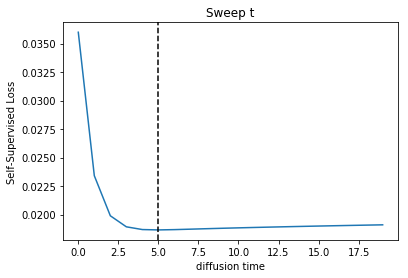

In [8]:
denoised_hca = n2s_magic(hca_down, verbose = False)

Running MAGIC on 1277 cells and 22415 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/Users/josh/.local/lib/python3.6/site-packages/magic/magic.py:376: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn("Input matrix contains unexpressed genes. "


  Calculated PCA in 4.80 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.29 seconds.
  Calculating affinities...
  Calculated affinities in 0.52 seconds.
Calculated graph and diffusion operator in 5.68 seconds.


Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'int64' is maintained. 


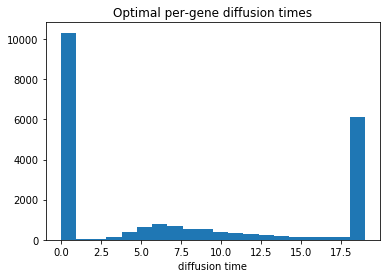

In [36]:
denoised_hca_per_gene, best_t, t_range, losses = n2s_magic(hca_down, per_gene = True)

In [11]:
from scipy.sparse import issparse
def cor(X, Y):
    if issparse(X):
        X = np.array(X.todense())
    if issparse(Y):
        Y = np.array(Y.todense())
    return np.corrcoef(X.ravel(), Y.ravel())[0, 1]

The per-gene version is performing worse. TODO: diagnose difference.

In [38]:
print("Original correlation: ", cor(hca_down.X.sqrt(), hca.X.sqrt()))

Original correlation:  0.7802032108454697


In [39]:
print("Denoised correlation: ", cor(np.sqrt(denoised_hca.X), hca.X.sqrt()))

Denoised correlation:  0.9062462913123165


In [40]:
print("Denoised correlation: ", cor(np.sqrt(denoised_hca_per_gene.X), hca.X.sqrt()))

Denoised correlation:  0.6886704158963931


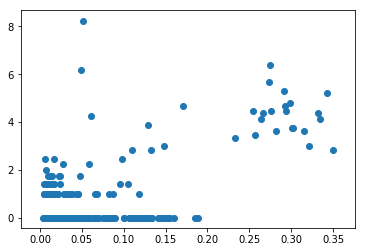

In [59]:
plt.scatter(np.sqrt(denoised_hca.X[:,cd79_idx]), np.sqrt(np.array(hca.X[:,cd79_idx].todense()).ravel()))

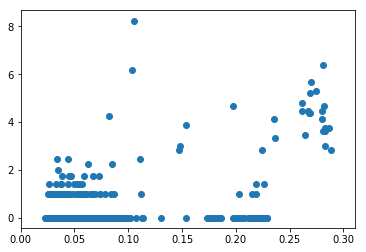

In [60]:
plt.scatter(np.sqrt(denoised_hca_per_gene.X[:,cd79_idx]), np.sqrt(np.array(hca.X[:,cd79_idx].todense()).ravel()))

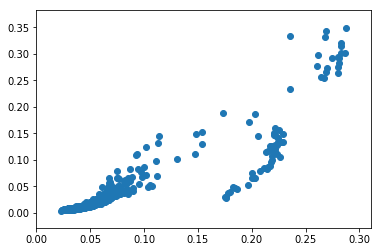

In [61]:
plt.scatter(np.sqrt(denoised_hca_per_gene.X[:,cd79_idx]), np.sqrt(denoised_hca.X[:,cd79_idx]))

In [62]:
cd79_idx = list(hca.var_names).index('CD79A')

In [63]:
hca[:,'CD79A'].X

array([1., 0., 0., ..., 0., 2., 0.], dtype=float32)

In [64]:
np.sqrt(denoised_hca_per_gene.X[:,70]).sum()

0.0

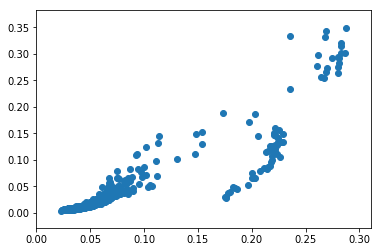

In [65]:
plt.scatter(np.sqrt(denoised_hca_per_gene[:,'CD79A'].X).ravel(), np.sqrt(denoised_hca[:,'CD79A'].X).ravel())

# Stability of PC Regression

In [11]:
paul = sc.datasets.paul15()

... 100%

... storing 'paul15_clusters' as categorical


Optimal rank: 16


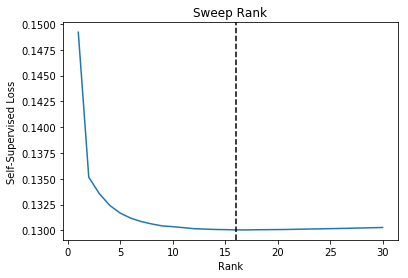

In [37]:
denoised_adata = n2s_low_rank(paul, regression=True)

In [ ]:
V = np.random.randn(500,5)
W = np.random.randn(5, 200)
L = (V.dot(W))
L = L/(np.max(L))*3

X1 = np.random.randn(V)
X2 = np.random.randn(W)

In [30]:
X = paul.X

X = X.astype(np.int)
np.random.seed(0)
X1 = np.random.binomial(X, 0.5)
X2 = X - X1

In [31]:
x = np.sqrt(denoised_adata.X)

In [36]:
rank_range = np.arange(1, 25, 2)
diff_from_opt = np.zeros(len(rank_range))
for i, r in enumerate(rank_range):
    model = LowRank(r, regression=True)
    y = model.fit_transform(X1, X2)
    diff = ((np.sqrt(y) - x)**2).mean()
    diff_from_opt[i] = diff
    print(r, ': ', diff)

1 :  0.02056164118959706
3 :  0.004906760324514881
5 :  0.0027534155659403267
7 :  0.0017187939439523943
9 :  0.001070357292043151
11 :  0.0006869342945542818
13 :  0.0003826122756931465
15 :  0.00018943817572063054
17 :  0.0002420149088303624
19 :  0.00037286476600429703
21 :  0.0005304636046424481
23 :  0.0006268238246982786


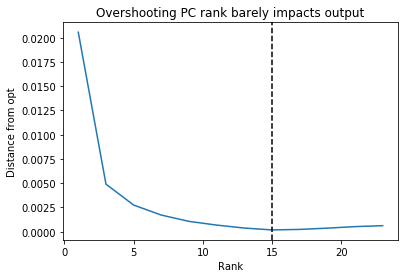

In [46]:
plt.plot(rank_range, diff_from_opt)
plt.xlabel("Rank")
plt.ylabel("Distance from opt")
plt.title("Overshooting PC rank barely impacts output")
plt.axvline(rank_range[np.argmin(diff_from_opt)], color='k', linestyle='--')